# Bandas Landsat 8
- Red: Band 4
- Near/Infrared: Band 5

In [16]:
import rasterio

path = "226"
row = "078"

redband = "LC08_L1GT_%s%s_20191005_20191005_01_RT_%s.TIF" % (path, row, "B4")
nirband = "LC08_L1GT_%s%s_20191005_20191005_01_RT_%s.TIF" % (path, row, "B5")
url = "https://landsat-pds.s3.amazonaws.com/c1/L8/" + \
       path + "/" + row + "/" + "LC08_L1GT_" + path + row + \
       "_20191005_20191005_01_RT/"


In [20]:
import rasterio.plot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
print(url+redband)
reddata = rasterio.open(url + redband)
profile = reddata.profile
oviews = reddata.overviews(1)
oview = oviews[1]
print("Factor: ", oview, profile)
alto = int(reddata.height // oview)
ancho = int(reddata.width // oview)
red = reddata.read(1, out_shape=(1, alto, ancho))

https://landsat-pds.s3.amazonaws.com/c1/L8/226/078/LC08_L1GT_226078_20191005_20191005_01_RT/LC08_L1GT_226078_20191005_20191005_01_RT_B4.TIF
Factor:  9 {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7651, 'height': 7741, 'count': 1, 'crs': CRS.from_dict(init='epsg:32621'), 'transform': Affine(30.0, 0.0, 282885.0,
       0.0, -30.0, -2759385.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


Text(0, 0.5, 'Fila #')

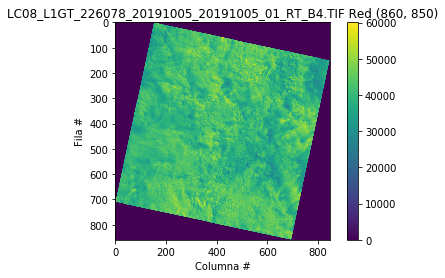

In [21]:
plt.imshow(red)
plt.colorbar()
plt.title("%s Red %s" % (redband, red.shape))
plt.xlabel("Columna #")
plt.ylabel("Fila #")